In [15]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy as sp
import matplotlib.patches as mpatches
from drift.core import manager
from scipy.sparse import lil_matrix
import sys
sys.path.insert(0,'/home/zahra/PIPELINE')
from log_red_cal_new import Visibilities_grid, A_matrix, colour_scatterplot, Bls_counts, Scatterplot

In [16]:

#ts_2=h5py.File('/media/zahra/DATA/example_5by5_lmax_200_no_scatter/draco_synthesis_no_fluc/maps/tstream_2.h5','r')
#ag_2=h5py.File('/media/zahra/DATA/example_5by5_lmax_200_no_scatter/draco_synthesis_no_fluc/rand_gains/amp_phase/app_gain_2.h5','r')
#rg_2=h5py.File('/media/zahra/DATA/example_5by5_lmax_200_no_scatter/draco_synthesis_no_fluc/rand_gains/sig_2.h5','r')

#gn_2=h5py.File('/media/zahra/DATA/example_5by5_lmax_200_no_scatter/draco_synthesis_no_fluc/rand_gains/ts_final/app_gain_noise_2.h5','r')


ts_2=h5py.File('/media/zahra/DATA/5by5_dishvar_pt1/draco_synthesis/maps/tstream_2.h5','r')
ag_2=h5py.File('/media/zahra/DATA/5by5_dishvar_pt1/draco_synthesis/rand_gains/amp_phase/app_gain_2.h5','r')
rg_2=h5py.File('/media/zahra/DATA/5by5_dishvar_pt1/draco_synthesis/rand_gains/sig_2.h5','r')

gn_2=h5py.File('/media/zahra/DATA/5by5_dishvar_pt1/draco_synthesis/rand_gains/ts_final/app_gain_noise_2.h5','r')

'''
ts_2=h5py.File('/media/zahra/DATA/5by5_dishvar_trial2/draco_synthesis/maps/tstream_2.h5','r')
ag_2=h5py.File('/media/zahra/DATA/5by5_dishvar_trial2/draco_synthesis/rand_gains/amp_phase/app_gain_2.h5','r')
rg_2=h5py.File('/media/zahra/DATA/5by5_dishvar_trial2/draco_synthesis/rand_gains/sig_2.h5','r')

gn_2=h5py.File('/media/zahra/DATA/5by5_dishvar_trial2/draco_synthesis/rand_gains/ts_final/app_gain_noise_2.h5','r')

'''

"\nts_2=h5py.File('/media/zahra/DATA/5by5_dishvar_trial2/draco_synthesis/maps/tstream_2.h5','r')\nag_2=h5py.File('/media/zahra/DATA/5by5_dishvar_trial2/draco_synthesis/rand_gains/amp_phase/app_gain_2.h5','r')\nrg_2=h5py.File('/media/zahra/DATA/5by5_dishvar_trial2/draco_synthesis/rand_gains/sig_2.h5','r')\n\ngn_2=h5py.File('/media/zahra/DATA/5by5_dishvar_trial2/draco_synthesis/rand_gains/ts_final/app_gain_noise_2.h5','r')\n\n"

In [17]:
time_channel=400
after_gain=ag_2
rand_gain=rg_2
Ndish=25
avg_reals=30

m = manager.ProductManager.from_config('/media/zahra/DATA/example_5by5_lmax_200_no_scatter/prod_params_custom.yaml')

t=m.telescope


Product directory: /media/zahra/DATA/example_5by5_lmax_200_no_scatter/bt_matrices


In [18]:
runs=100
Tsys=50

x_true_real=Visibilities_grid(m,ts_2,rand_gain,after_gain,gn_2,time_channel, Tsys, 1)[7][:Ndish, time_channel]

gg=np.zeros((runs,Ndish))
for ind_run in range(runs):
    gg[ind_run,:]=Visibilities_grid(m,ts_2,rand_gain,after_gain,gn_2,time_channel, Tsys, 1)[5][:Ndish, time_channel]

print x_true_real
print gg

(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.01220703197759582

In [19]:
#np.save('gg_logcal_100runs_Tsys_50_ndays_1_5by5_gain_fluc_pt1',gg)
#np.save('sim_gains_amp_logcal_100runs_Tsys_50_ndays_1_5by5_gain_fluc_pt1',x_true_real)


In [20]:
#gg_logcal_pt1fluc=np.load('gg_logcal_100runs_Tsys_50_ndays_1_5by5_gain_fluc_pt1.npy')
#sim_gains_logcal_pt1fluc=np.load('sim_gains_amp_logcal_100runs_Tsys_50_ndays_1_5by5_gain_fluc_pt1.npy')


In [21]:
gg_logcal, sim_gains_logcal = gg, x_true_real
def gains_mean_and_rel_err(gg,sim_gains_amp):
    gain_std=(np.std(gg,axis=0)/np.sqrt(runs)).flatten()
    gain_mean=np.mean(gg,axis=0).flatten() #shape is 98, we take every second one for amp so shape is 49
    rec_gains_mean_amp=gain_mean
    rec_gains_std_amp=gain_std
    rel_err_amp=np.abs(rec_gains_mean_amp-sim_gains_amp)/(sim_gains_amp)

    rel_err_amp_mean=np.mean(rel_err_amp)
    rel_err_amp_std=np.std(rel_err_amp,ddof=1)
    return rec_gains_mean_amp, rec_gains_std_amp, rel_err_amp, rel_err_amp_mean, rel_err_amp_std

rec_gains_mean_amp_2,_,rel_err_amp_2, rel_err_amp_mean_2 ,rel_err_amp_std_2 = gains_mean_and_rel_err(np.exp(gg_logcal),np.exp(sim_gains_logcal))

print rel_err_amp_mean_2, rel_err_amp_std_2

0.06521721684986045 0.04974533275149474


In [22]:
#np.save('gg_logcal_5by5_nogainfluc_Tsys_50_no_dish_scatter', gg)
#np.save('sim_gains_logcal_5by5_nogainfluc_Tsys_50_no_dish_scatter', x_true_real)

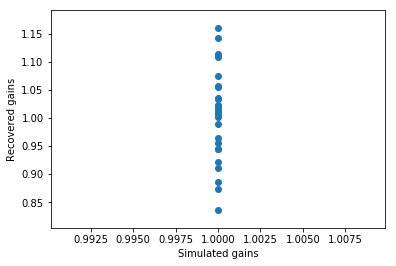

In [23]:
fig, ax = plt.subplots()

ax.scatter(np.exp(sim_gains_logcal),rec_gains_mean_amp_2)
#ax.plot(lims, lims,'g')
#plt.errorbar(x_true_real[:Ndish,time_channel],x_rec_real[:Ndish,time_channel],xerr=None,yerr=error[:Ndish],linestyle="None")
plt.xlabel('Simulated gains')
plt.ylabel('Recovered gains')
lim=.002
#plt.ylim(0.998,1.002)
#plt.savefig('avgd_recgains_vs_simgains_logcal_5by5_nogainfluc_Tsys_50_pt1_dish_scatter')

plt.show()

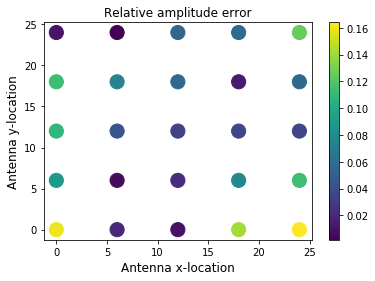

In [24]:
colour_scatterplot(m,rel_err_amp_2)

In [25]:
def hist_rel_err_mean_std_logcal(gg,sim_gains_amp):
    gg_amp=gg
    rel_error=(np.abs(gg_amp-sim_gains_amp))/(sim_gains_amp)
    gg_amp_mean=np.mean(rel_error,axis=1) #shape is number of runs
    gg_amp_std=np.std(rel_error,axis=1, ddof=1)
    return gg_amp_std, gg_amp_mean

def hist_rel_err_mean_std(gg,sim_gains_amp):
    gg_amp=gg[:,0::2]
    rel_error=np.abs((gg_amp-sim_gains_amp))/sim_gains_amp
    gg_amp_mean=np.mean(rel_error,axis=1) #shape is number of runs
    gg_amp_std=np.std(rel_error,axis=1,ddof=1)
    return gg_amp_std, gg_amp_mean


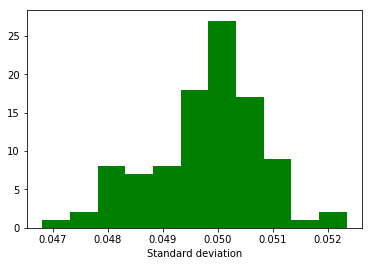

In [26]:
std, mean=hist_rel_err_mean_std_logcal(np.exp(gg_logcal),np.exp(sim_gains_logcal))
plt.hist(std,'auto',color='g')
#plt.hist(gg_amp_std_1m_logcal,'auto',color='g')
plt.xlabel('Standard deviation')
#plt.title('Logcal')
#plt.savefig('std_hist_logcal_5by5_nogainfluc_Tsys_50_pt1_dish_scatter')
plt.show()

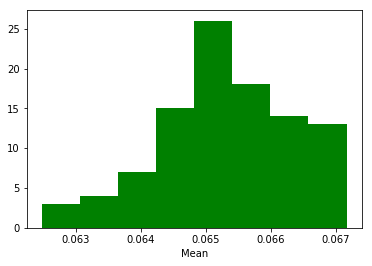

In [27]:
plt.hist(mean,'auto',color='g')
#plt.hist(gg_amp_std_1m_logcal,'auto',color='g')
plt.xlabel('Mean')
#plt.title('Logcal')
#plt.savefig('mean_hist_logcal_5by5_nogainfluc_Tsys_50_pt1_dish_scatter')
plt.show()